In [35]:
%matplotlib inline

import mahotas
from PIL import Image
import PIL.ImageOps    
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
from StringIO import StringIO
from scipy.ndimage.interpolation import shift


In [2]:
a = np.array((0,1,1,0,0,0), dtype=np.int)
print a
print np.invert(a)
print 1-a

[0 1 1 0 0 0]
[-1 -2 -2 -1 -1 -1]
[1 0 0 1 1 1]


min: 1.22846145149e-12
max: 1.0
min: 1.82598771659e-08
max: 0.991564273834
online
(1048576,)
(1024, 1024)
[ 1.  1.  1. ...,  1.  1.  1.]
[1 1 1 ..., 1 1 1]
[284185 764391]
offline
(1048576,)
(1024, 1024)
[ 0.  0.  0. ...,  0.  0.  0.]
[0 0 0 ..., 0 0 0]
[251880 796696]
online_img_shift: (1024, 1024)
online shift


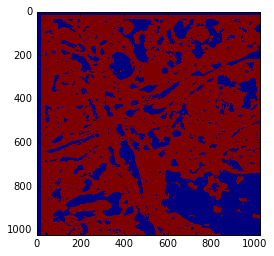

online image


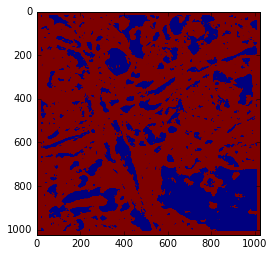

offline image


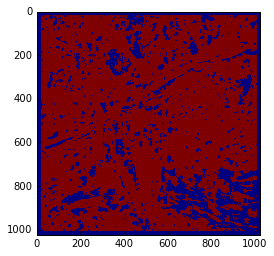

online image labeled #labels: 665


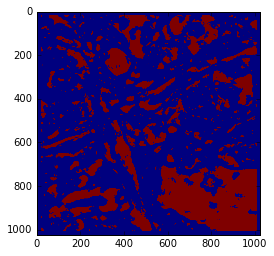

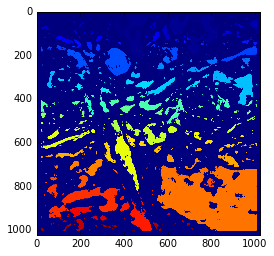

In [39]:
def read_prob(path):
    with open(path, 'r') as content_file:
        content = content_file.read()

    content = content.replace('[', '')
    content = content.replace(']', '')
    d = np.fromstring(content, dtype=float, sep=',')
    return d

def threshold(prob, factor=0.5):
    prob[ prob >= factor ] = 9
    prob[ prob <  factor ] = 0
    prob[ prob == 9      ] = 1
    return prob


online = read_prob('ac3_input_0144.tif.online.prob')
print 'min:', np.min( online )
print 'max:', np.max( online )
factor=0.001
online_int = threshold( online,factor=factor )
online_int = online_int.astype(dtype=int)
online_img = online_int.reshape(1024, 1024)


offline = read_prob('ac3_input_0144.tif.offline.prob')
print 'min:', np.min( offline )
print 'max:', np.max( offline )
offline_int = threshold( offline,factor=factor )
offline_int = offline_int.astype(dtype=int)
offline_img = offline_int.reshape(1024, 1024)

online_img_inv = 1-online_img
online_img_labeled, n_online_labels  = mahotas.label(online_img_inv)


print 'online'
print online.shape
print online_img.shape
print online
print online_int
print np.bincount( online_int )

print 'offline'
print offline.shape
print offline_img.shape
print offline
print offline_int
print np.bincount( offline_int )


patchSize = 39
shift_amount = np.floor( patchSize/2 )
online_img_shift = shift(online_img,(shift_amount, shift_amount))
print 'online_img_shift:',online_img_shift.shape

print 'online shift'
plt.imshow(online_img_shift)
plt.show()

print 'online image'
plt.imshow(online_img)
plt.show()

print 'offline image'
plt.imshow(offline_img)
plt.show()

print 'online image labeled #labels:', n_online_labels
plt.imshow(online_img_inv)
plt.show()
plt.imshow(online_img_labeled)
plt.show()


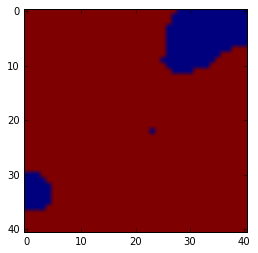

yes....
3 : 3 , 3 : 60


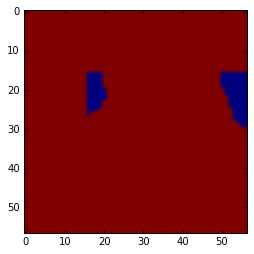

border_patch: 20
border: 29


In [66]:

border_patch = int(np.ceil(patchSize/2.0))
row = 31
col = 31
r1  = row+patchSize-border_patch
r2  = row+patchSize+border_patch+1
c1  = col+patchSize-border_patch
c2  = col+patchSize+border_patch+1
imgPatch = online_img[r1:r2,c1:c2]
#imgPatch = skimage.transform.rotate(imgPatch, random.choice(xrange(360)))
#imgPatch = imgPatch[0:patchSize,0:patchSize]
#print imgPatch
plt.imshow(imgPatch)
plt.show()


border_patch = int( np.ceil(patchSize/2.0))
border = int(np.ceil(np.sqrt(2*(border_patch**2))))

limits = (border, online_img.shape[0]-border)

if (row>=limits[0] and row < limits[1]) and (col>=limits[0] and col < limits[1]):
    print 'yes....'
    r1 = row-border+1
    r2 = row+border
    c1 = col-border+1
    c2 = col+border
    print r1, ':', r1, ',', c1, ':', c2
    imgPatch = online_img[row-border+1:row+border, col-border+1:col+border]
    plt.imshow(imgPatch)
    plt.show()
    
'''
r1  = row+patchSize-border_patch
r2  = row+patchSize+border_patch+1
c1  = col+patchSize-border_patch
c2  = col+patchSize+border_patch+1

r1 = row-border+1
r2 = row+border
c1 = col-border+1
c2 = col+border
'''


#imgPatch = online_img[row-border+1:row+border, col-border+1:col+border]
print 'border_patch:',border_patch
print 'border:', border
#print imgPatch





(1048576,)
[0 1]
#labels:  779
probimage


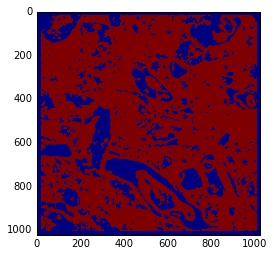

probimage_inv


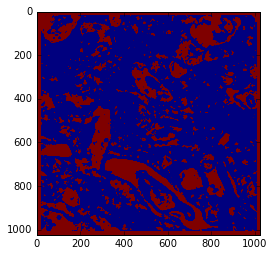

probimage_labeled


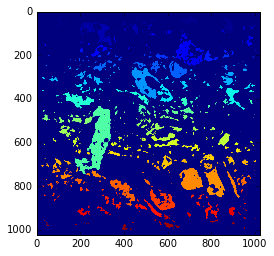

In [9]:
path = '../../../icon/code/offline/prob0.seg'
with open(path, 'r') as content_file:
    content = content_file.read()


content = content.replace('[', '')
content = content.replace(']', '')
d = np.fromstring(content, dtype=int, sep=',')
print d.shape
print np.unique( d )

probimage = d.reshape(1024, 1024)
probimage_inv = 1-probimage #np.invert( probimage )

probimage_labeled, n_labels  = mahotas.label(probimage_inv)
print '#labels: ',n_labels
#print np.unique(probimage_labeled)


print 'probimage'
plt.imshow(probimage)
plt.show()

print 'probimage_inv'
plt.imshow(probimage_inv)
plt.show()

print 'probimage_labeled'
plt.imshow(probimage_labeled)
plt.show()


[0 0 0 ..., 0 0 0]
[0 0 0 ..., 0 0 0]
[ True  True  True ...,  True  True  True]
300840
0.713096618652
print probimage


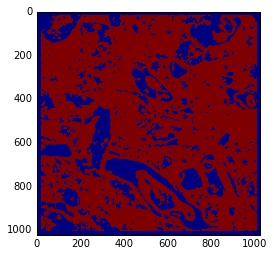

testlabel


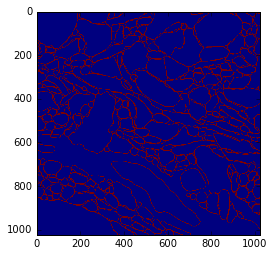

In [10]:

testlabel = mahotas.imread('../membranes/test/train-labels_0090.tif')

probflat = probimage.flatten()
testlabelflat = testlabel.flatten()

print probflat
print testlabelflat
matched = (probflat == testlabelflat)
print matched
print np.sum(matched)
print 1-float(np.sum(matched))/matched.shape[0]


print 'print probimage'
plt.imshow(probimage)
plt.show()

print 'testlabel'
plt.imshow(testlabel)
plt.show()


[0 0 0 ..., 0 0 0]


[  0   1   2   4   5   7   8  13  15  16  17  18  20  21  22  23  24  28
  30  32  34  39  60  69  82  94  95  96  97  98 100 103 105 109 110 114
 118 120 122 123 126 129 144 151 152 153 159 161 162 167 175 176 177 178
 187 188 189 191 194 195 196 203 204 205 208 223 229 231 232 233 236 238
 240 243 244 245 253 254 255 271 275 280 281 283 284 285 289 299 300 303
 309 313 314 327 328 329 331 334 335 340 354 355 356 358 359 360 361 362
 363 364 365 366 367 368 370 373 374 375 377 378 379 381 392 393 394 395
 396 398 401 402 403 412 419 420 426 427 432 433 434 441 442 446 447 448
 449 450 455 456 457 458 460 467 476 477 478 479 481 482 483 484 485 486
 490 501 502 512 513 518 520 523 525 526 527 531 538 540 541 549 551 553
 554 556 558 559 566 568 569 574 575 578 579]
#labels:  20
(1024, 1024)
<type 'numpy.ndarray'>


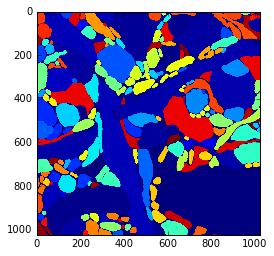

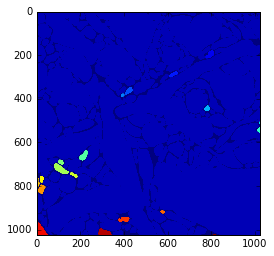

In [8]:
#image = mahotas.imread('train-labels_0095.tif')
image = mahotas.imread('ac3_labels_0144.tif')
print np.unique(image)
image_labeled, n_labels  = mahotas.label(image)
print '#labels: ',n_labels
print image.shape
print type(image)
plt.imshow(image)
plt.show()
plt.imshow(image_labeled)
plt.show()

[  0 255]
#labels:  8


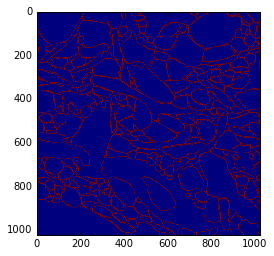

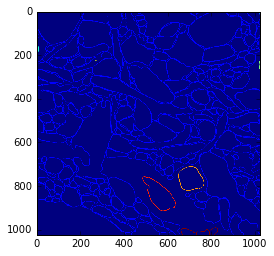

In [21]:
image = mahotas.imread('../../../icon/data/reference/labels/membranes/test/train-labels_0095.tif')
print np.unique(image)
image_labeled, n_labels  = mahotas.label(image)
print '#labels: ',n_labels

plt.imshow(image)
plt.show()
plt.imshow(image_labeled)
plt.show()

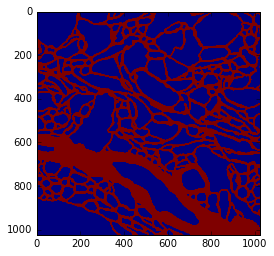

In [23]:
image_inv = np.invert(image)
plt.imshow(image_inv)
plt.show()

#labels: 2


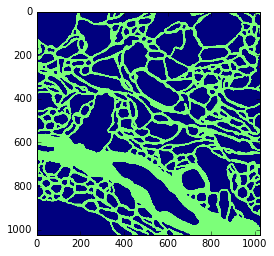

In [24]:
image_labeled, n_labels  = mahotas.label(image_inv)
print '#labels:', n_labels
plt.imshow(image_labeled)
plt.show()

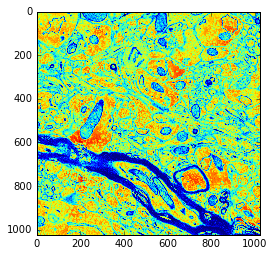

-----
prob: 0.1 25 1757 [980768  67808]


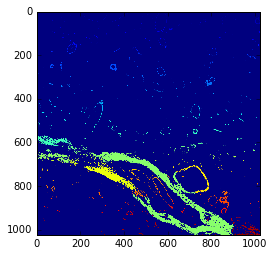

prob: 0.2 51 3813 [925672 122904]


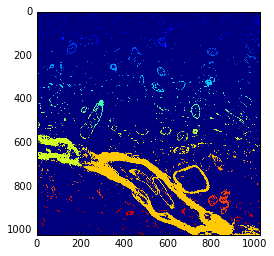

prob: 0.3 76 6174 [815857 232719]


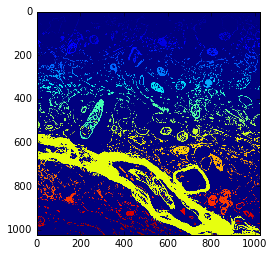

prob: 0.4 102 3498 [637263 411313]


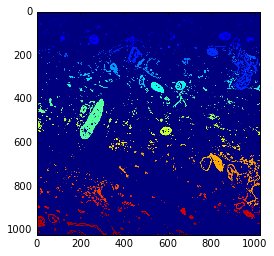

prob: 0.5 127 3821 [435257 613319]


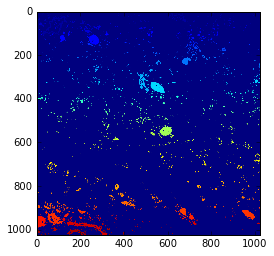

prob: 0.6 153 2132 [180917 867659]


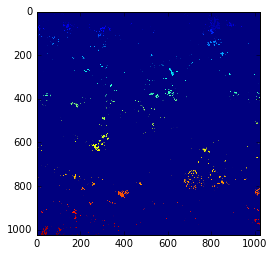

prob: 0.7 178 334 [  17540 1031036]


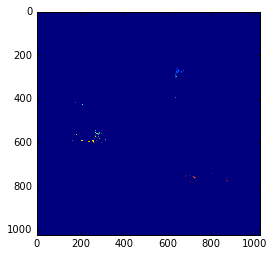

prob: 0.8 204 2 [    199 1048377]


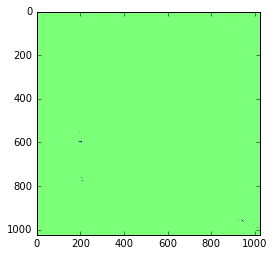

prob: 0.9 229 1 [      0 1048576]


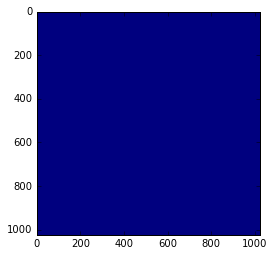

In [51]:
testimage = mahotas.imread('../../images/test/train-input_0090.tif')
plt.imshow(testimage)
plt.show()

thresholds = np.arange(0.1, 1.0, 0.1)

# for t in thresholds:
#     tt = int(t*255)
#     testimage1 = np.copy( testimage )
#     testimage1[testimage1<= tt] = 0
#     testimage1[testimage1> tt] = 1
#     print 'testimage1:',t,tt,np.bincount(testimage1.flatten())

print '-----'
for t in thresholds:
        p = np.copy( testimage )
        tt = int(t*255)
        p[p <= tt] = 0
        p[p >tt] = 1
        p_int = np.int64( p )
        p_inv = 1-p_int

        p_labeled, n_labels  = mahotas.label(p_inv)
        print 'prob:',t,tt,n_labels,np.bincount(p_inv.flatten())
        plt.imshow(p_labeled)
        plt.show()


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18